<a href="https://colab.research.google.com/github/sdaraqshan/Summer-Internship-Diabetes_Pred/blob/main/Diabetes_Prediction_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
location = '/content/diabetes.csv'
f = pd.read_csv(location)
data = pd.DataFrame(f)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#cleaning the dataset  from missing values or zeros
#zeros or missing values will be replaced by the mean of that particular column
# this practice is the best practie to have a readable and consistent data values
cols_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
# with this function , i dealt with missing values and NaN values 
for i in cols_clean:
    data[i] = data[i].replace(0,np.NaN)
    cols_mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN, cols_mean)
data1 = data
data1.head().style.highlight_max(color="lightblue").highlight_min(color="red")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [5]:
# Let's take a quick statistcal view of the data provided
print(data1.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  121.682292  ...   33.240885    0.348958
std       3.369578   30.435999  ...   11.760232    0.476951
min       0.000000   44.000000  ...   21.000000    0.000000
25%       1.000000   99.750000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


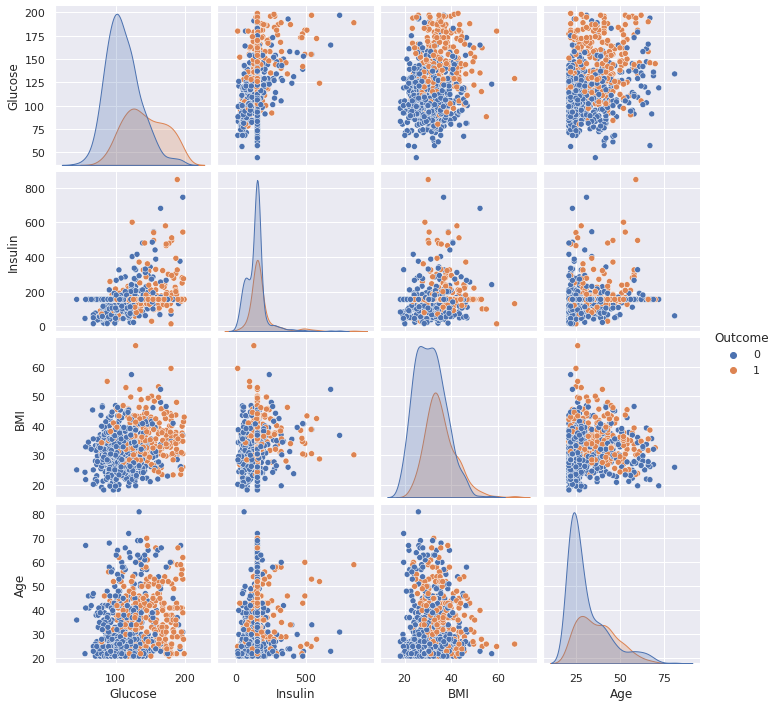

In [6]:
#Plotting the dataset
#The diabetes updated dataset is ready for a basic plotting, in order to see how would our data looks like, also plotting at this stage will help me decide which column I will choose to run a K-nearest neighbour (KNN) experiment. For plotting I’ve used pairplot() function with the help of Seaborn library , that will give me a range of graph plotting for each group of data presented in the dataset .

graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
print(sns.pairplot(data1[graph],hue='Outcome', diag_kind='kde'))


In [8]:
# for the purpose of simplicity and analysing the most relevent  data , we will select three features of the dataset
# Glucose , Insulin and BMI
q_cols = ['Glucose','Insulin','BMI','Outcome']
# defining variables and features for the dataset for splitting 
df = data1[q_cols]
print(df.head(2))


   Glucose  Insulin   BMI  Outcome
0    148.0    155.0  33.6        1
1     85.0    155.0  26.6        0


In [9]:
# let's split the data into training and testing datasets
split = 0.75 # 75% train and 25% test dataset
total_len = len(df)
split_df = int(total_len*split)
train, test = df.iloc[:split_df,0:4],df.iloc[split_df:,0:4] 
train_x = train[['Glucose','Insulin','BMI']]
train_y = train['Outcome']
test_x = test[['Glucose','Insulin','BMI']]
test_y = test['Outcome']

In [11]:
a = len(train_x) 
b = len(test_x)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)


 Training data = 576 
 Testing data = 192 
 Total data length =  768


In [12]:
# let's test it using KNN  classifier with a loop to cover as much n-neightbors as possible 
def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
    return results

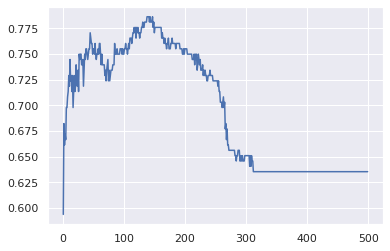

In [13]:
n= 500
output = knn(train_x,train_y,test_x,test_y,n)
n_range = range(1, n)
plt.plot(n_range, output)